# Introduction

In this project, you will act as a data visualization developer at Yahoo Finance! You will be helping the "Netflix Stock Profile" team visualize the Netflix stock data. In finance, a _stock profile_ is a series of studies, visualizations, and analyses that dive into different aspects a publicly traded company's data. 

For the purposes of the project, you will only visualize data for the year of 2017. Specifically, you will be in charge of creating the following visualizations:
+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 

Note: We are using the Dow Jones Industrial Average to compare the Netflix stock to the larter stock market. Learn more about why the Dow Jones Industrial Average is a general reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp).

During this project, you will analyze, prepare, and plot data. Your visualizations will help the financial analysts asses the risk of the Netflix stock.

Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)


## Step 1

Let's get our notebook ready for visualizing, and import the necessary modules.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2

Let's load the datasets and inspect them.

Note: In the Yahoo Data, `Adj Close` represents the adjusted close price adjusted for both dividends and splits. This means this is the true closing stock price for a given business day.

In [2]:
netflix_stocks = pd.read_csv('NFLX.csv')
print(netflix_stocks.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  


Load **DJI.csv** into a DataFrame called `dowjones_stocks`. Then, quickly inspect it.

In [3]:
dowjones_stocks = pd.read_csv('DJI.csv')
print(dowjones_stocks.head())

         Date          Open          High           Low         Close  \
0  2017-01-01  19872.859375  20125.580078  19677.939453  19864.089844   
1  2017-02-01  19923.810547  20851.330078  19831.089844  20812.240234   
2  2017-03-01  20957.289063  21169.109375  20412.800781  20663.220703   
3  2017-04-01  20665.169922  21070.900391  20379.550781  20940.509766   
4  2017-05-01  20962.730469  21112.320313  20553.449219  21008.650391   

      Adj Close      Volume  
0  19864.089844  6482450000  
1  20812.240234  6185580000  
2  20663.220703  6941970000  
3  20940.509766  5392630000  
4  21008.650391  6613570000  


Load **NFLX_daily_by_quarter.csv** into a DataFrame called `netflix_stocks_quarterly`. Then, quickly inspect it.

In [4]:
netflix_stocks_quarterly = pd.read_csv('NFLX_daily_by_quarter.csv')
print(netflix_stocks_quarterly.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-03  124.959999  128.190002  124.309998  127.489998  127.489998   
1  2017-01-04  127.489998  130.169998  126.550003  129.410004  129.410004   
2  2017-01-05  129.220001  132.750000  128.899994  131.809998  131.809998   
3  2017-01-06  132.080002  133.880005  129.809998  131.070007  131.070007   
4  2017-01-09  131.479996  131.990005  129.889999  130.949997  130.949997   

     Volume Quarter  
0   9437900      Q1  
1   7843600      Q1  
2  10185500      Q1  
3  10657900      Q1  
4   5766900      Q1  


## Step 3

Let's learn more about our data. The datasets are large and it may be easier to view the entire dataset locally on your computer. Open the CSV files directly from the folder you downloaded for this project.
 - `NFLX` is the stock ticker symbol for Netflix and `^DJI` is the stock ticker symbol for the Dow Jones industrial Average, which is why the CSV files are named accordingly
 - In the Yahoo Data, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.
 - You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 
 
Answer the following questions by inspecting the data in the **NFLX.csv**,**DJI.csv**, and **NFLX_daily_by_quarter.csv** in your computer.

What year is represented in the data? Look out for the latest and earliest date.

In [5]:
# 2017

+ Is the data represented by days, weeks, or months? 
+ In which ways are the files different? 
+ What's different about the columns for `netflix_stocks` versus `netflix_stocks_quarterly`?

In [6]:
# YY-MM-DD
# netflix_stocks_quarterly has an extra column quarter that tells us what quater the current data represents.

## Step 4

Great! Now that we have spent sometime looking at the data, let's look at the column names of the DataFrame `netflix_stocks` using `.head()`. 

In [7]:
print(netflix_stocks.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  


What do you notice? The first two column names are one word each, and the only one that is not is `Adj Close`! 

The term `Adj Close` is a confusing term if you don't read the Yahoo Documentation. In Yahoo, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.

This means this is the column with the true closing price, so these data are very important.

Use Pandas to change the name of of the column to `Adj Close` to `Price` so that it is easier to work with the data.

Do this for the Dow Jones and Netflix Quarterly pandas dataframes as well.


In [8]:
netflix_stocks.rename(columns={
    'Adj Close': 'Price'},
    inplace=True
)

dowjones_stocks.rename(columns={
    'Adj Close': 'Price'},
    inplace=True
)

netflix_stocks_quarterly.rename(columns={
    'Adj Close': 'Price'},
    inplace=True
)

In [9]:
print(netflix_stocks.head())

         Date        Open        High         Low       Close       Price  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  


In [10]:
print(dowjones_stocks.head())
print(netflix_stocks_quarterly.head())

         Date          Open          High           Low         Close  \
0  2017-01-01  19872.859375  20125.580078  19677.939453  19864.089844   
1  2017-02-01  19923.810547  20851.330078  19831.089844  20812.240234   
2  2017-03-01  20957.289063  21169.109375  20412.800781  20663.220703   
3  2017-04-01  20665.169922  21070.900391  20379.550781  20940.509766   
4  2017-05-01  20962.730469  21112.320313  20553.449219  21008.650391   

          Price      Volume  
0  19864.089844  6482450000  
1  20812.240234  6185580000  
2  20663.220703  6941970000  
3  20940.509766  5392630000  
4  21008.650391  6613570000  
         Date        Open        High         Low       Close       Price  \
0  2017-01-03  124.959999  128.190002  124.309998  127.489998  127.489998   
1  2017-01-04  127.489998  130.169998  126.550003  129.410004  129.410004   
2  2017-01-05  129.220001  132.750000  128.899994  131.809998  131.809998   
3  2017-01-06  132.080002  133.880005  129.809998  131.070007  131.070007

## Step 5

In this step, we will be visualizing the Netflix quarterly data! 

We want to get an understanding of the distribution of the Netflix quarterly stock prices for 2017. Specifically, we want to see in which quarter stock prices flucutated the most. We can accomplish this using a violin plot with four violins, one for each business quarter!

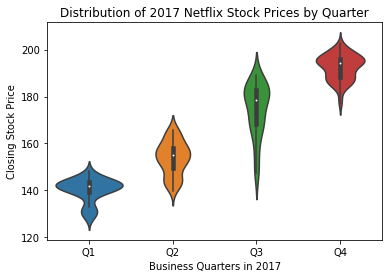

In [11]:
ax = sns.violinplot()
#sns.set_style('darkgrid')
sns.set_context("notebook")
sns.violinplot(data=netflix_stocks_quarterly, x='Quarter', y='Price')
ax.set_title('Distribution of 2017 Netflix Stock Prices by Quarter')
plt.ylabel('Closing Stock Price')
plt.xlabel('Business Quarters in 2017')
plt.show()

## Graph Literacy
- What are your first impressions looking at the visualized data?

- In what range(s) did most of the prices fall throughout the year?

- What were the highest and lowest prices? 

In [12]:
# Looks like the prices gradually go up and end up higher in Q4. 
# The lowest prices were in the Q1 and the highest in Q4.
# Most prices fall within range(135, 200) throughout the year.  

## Step 6

Next, we will chart the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. We will accomplish this using a scatter chart. 

1. Plot the actual EPS by using `x_positions` and `earnings_actual` with the `plt.scatter()` function. Assign `red` as the color.
2. Plot the actual EPS by using `x_positions` and `earnings_estimate` with the `plt.scatter()` function. Assign `blue` as the color

3. Often, estimates and actual EPS are the same. To account for this, be sure to set your transparency  `alpha=0.5` to allow for visibility pf overlapping datapoint.
4. Add a legend by using `plt.legend()` and passing in a list with two strings `["Actual", "Estimate"]`

5. Change the `x_ticks` label to reflect each quarter by using `plt.xticks(x_positions, chart_labels)`
6. Assing "`"Earnings Per Share in Cents"` as the title of your plot.


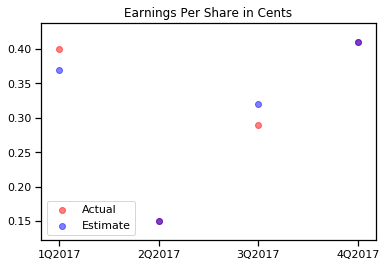

In [13]:
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]

plt.scatter(x_positions, earnings_actual, color='red', alpha=0.5)
sns.set_context("notebook")
plt.scatter(x_positions, earnings_estimate, color='blue', alpha=0.5)
plt.legend(['Actual', 'Estimate'])
plt.xticks(x_positions, chart_labels)
plt.title('Earnings Per Share in Cents')
plt.show()


## Graph Literacy

+ What do the purple dots tell us about the actual and estimate earnings per share in this graph?


In [14]:
 # The purple dots tell us that in Q2 and Q4 estimate earning per share actually turned out to be true. 

## Step 7

Next, we will visualize the earnings and revenue reported by Netflix by mapping two bars side-by-side.

As you may recall, plotting side-by-side bars in Matplotlib requires computing the width of each bar before hand.

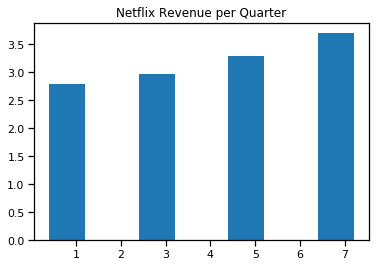

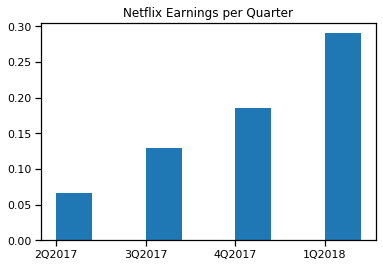

In [15]:
# The metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

# Revenue
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars1_x = [t*element + w*n for element
             in range(d)]

plt.bar(bars1_x, revenue_by_quarter)
plt.title('Netflix Revenue per Quarter')

plt.show()


# Earnings
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars2_x = [t*element + w*n for element
             in range(d)]



middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]
labels = ["Revenue", "Earnings"]

plt.bar(bars2_x, earnings_by_quarter)
plt.title('Netflix Earnings per Quarter')
plt.xticks(middle_x, quarter_labels)
plt.show()


## Graph Literacy
What are your first impressions looking at the visualized data?

- Does Revenue follow a trend?
- Do Earnings follow a trend?
- Roughly, what percentage of the revenue constitutes earnings?

In [16]:
# Both revenue and earnings tend to go up during the year and reach its peak in Q4. 
# While revenue plot has a smoother way up with the smaller gap between Q1 and Q4, earnings tend to go up
# faster and double every quarter.

## Step 8

In this last step, we will compare Netflix stock to the Dow Jones Industrial Average in 2017. We will accomplish this by plotting two line charts side by side in one figure. 

Since `Price` which is the most relevant data is in the Y axis, let's map our subplots to align vertically side by side.

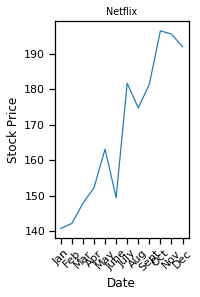

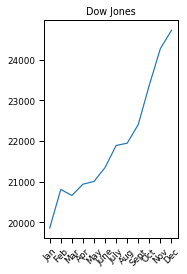

In [17]:
# Left plot Netflix
# ax1 = plt.subplot(total number rows, total number columns, index of subplot to modify)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
ax1 = plt.subplot(1, 2, 1)
sns.set_context("paper")
plt.plot(netflix_stocks['Date'], netflix_stocks['Price'])
ax1.set_title('Netflix')
ax1.set_xlabel('Date')
ax1.set_xticklabels(months, rotation=45)
ax1.set_ylabel('Stock Price')
plt.subplots_adjust(wspace=0.5)
plt.show()



# Right plot Dow Jones
# ax2 = plt.subplot(total number rows, total number columns, index of subplot to modify)
ax2 = plt.subplot(1, 2, 2)
sns.set_context("paper")
plt.plot(dowjones_stocks['Date'], dowjones_stocks['Price'])
ax2.set_title('Dow Jones')
ax2.set_xticklabels(months, rotation=45)
plt.subplots_adjust(wspace=0.5)
plt.show()

In [18]:
# Looking at the graphs, we see that both Netflix and Dow Jones prices are going up by the end of 2017,
# but while Dow Jones prices form quite a smooth line, Netflix prices are more volatile, 
# with a few sharp drops during the year.